# Fraud Detection EDA

## Imports and Global Settings

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation, plot_missing
# Geo-Viz
import folium
import geopandas as gpd
import geoplot as gplt
#import descartes
from shapely.geometry import Point, Polygon

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)

## Load Data

In [2]:
original_data = pd.read_json('../data/working_data.json', orient='records', lines=True)

filename = "model_data_v2"
current_data = pd.read_json(f'../data/{filename}.json', orient='records', lines=True)

od = original_data.copy()
cfd = current_data.copy()

features_to_test = [
        "body_length", "channels", "delivery_method", "fb_published",
        "gts", "has_analytics", "has_header", "has_logo", "listed",
        "name_length", "num_order", "num_payouts", "org_facebook",
        "org_twitter", "user_type", "sale_duration", "sale_duration2",
        "show_map", "user_age", "venue_latitude", "venue_longitude",
        "num_previous_payouts", "previous_payouts_total",
        "num_ticket_types", "num_tickets_available", "total_ticket_value",
        "avg_ticket_cost", "known_payee_name", "known_venue_name",
        "known_payout_type", "total_empty_values", "name_proba",
        "description_proba", "org_name_proba", "org_desc_proba", "is_fraud"
        ]

cd = cfd[features_to_test]

## Basic EDA

In [3]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11469 entries, 0 to 11468
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   body_length             11469 non-null  int64  
 1   channels                11469 non-null  int64  
 2   delivery_method         11469 non-null  int64  
 3   fb_published            11469 non-null  int64  
 4   gts                     11469 non-null  float64
 5   has_analytics           11469 non-null  int64  
 6   has_header              11469 non-null  int64  
 7   has_logo                11469 non-null  int64  
 8   listed                  11469 non-null  int64  
 9   name_length             11469 non-null  int64  
 10  num_order               11469 non-null  int64  
 11  num_payouts             11469 non-null  int64  
 12  org_facebook            11469 non-null  int64  
 13  org_twitter             11469 non-null  int64  
 14  user_type               11469 non-null

In [4]:
cd.describe()

body_length      channels  delivery_method  fb_published  \
count  11469.000000  11469.000000     11469.000000  11469.000000   
mean    3681.236812      6.188595         0.439707      0.128956   
std     5730.995137      3.862602         0.594091      0.335166   
min        0.000000      0.000000        -1.000000      0.000000   
25%      758.000000      5.000000         0.000000      0.000000   
50%     2014.000000      6.000000         0.000000      0.000000   
75%     4296.000000      8.000000         1.000000      0.000000   
max    65535.000000     13.000000         3.000000      1.000000   

                 gts  has_analytics    has_header      has_logo        listed  \
count   11469.000000   11469.000000  11469.000000  11469.000000  11469.000000   
mean     2487.781116       0.072369     -0.252332      0.844886      0.859534   
std      9665.369446       0.259109      0.664365      0.362029      0.347485   
min         0.000000       0.000000     -1.000000      0.000000      0.000000   
25%       116.190000       0.000000     -1.000000      1.000000      1.000000   
50%       433.870000       0.000000      0.000000      1.000000      1.000000   
75%      1550.900000       0.000000      0.000000      1.000000      1.000000   
max    306293.930000       1.000000      1.000000      1.000000      1.000000   

        name_length     num_order   num_payouts  org_facebook   org_twitter  \
count  11469.000000  11469.000000  11469.000000  11469.000000  11469.000000   
mean      41.765629     28.121545     33.224605      7.966082      4.310489   
std       23.248112     95.419441    122.348651     11.779629      6.012481   
min        0.000000      0.000000      0.000000     -1.000000     -1.000000   
25%       26.000000      2.000000      0.000000      0.000000      0.000000   
50%       38.000000      8.000000      2.000000      0.000000      0.000000   
75%       53.000000     23.000000     13.000000     14.000000     11.000000   
max      253.000000   2000.000000   1858.000000     91.000000     23.000000   

          user_type  sale_duration  sale_duration2     show_map      user_age  \
count  11469.000000   11469.000000    11469.000000  11469.00000  11469.000000   
mean       2.722120      46.728921       51.004360      0.84323    374.956055   
std        1.711575      54.636411       59.738961      0.36360    420.692271   
min        1.000000    -143.000000      -86.000000      0.00000      0.000000   
25%        1.000000      16.000000       17.000000      1.00000     13.000000   
50%        3.000000      32.000000       35.000000      1.00000    241.000000   
75%        3.000000      59.000000       64.000000      1.00000    605.000000   
max      103.000000     980.000000      980.000000      1.00000   3794.000000   

       venue_latitude  venue_longitude  num_previous_payouts  \
count    11469.000000     11469.000000          11469.000000   
mean        32.461559       -55.146589             76.217107   
std         21.662695        65.918239            237.402777   
min        -45.045208      -159.390183              0.000000   
25%         32.716911       -95.435076              2.000000   
50%         39.207216       -77.150095              8.000000   
75%         43.688564        -1.000000             37.000000   
max         64.844022       176.169492           2048.000000   

       previous_payouts_total  num_ticket_types  num_tickets_available  \
count            1.146900e+04      11469.000000           1.146900e+04   
mean             8.644447e+04          2.704333           8.134105e+03   
std              4.911169e+05          3.855432           3.767656e+05   
min              0.000000e+00          0.000000           0.000000e+00   
25%              6.100000e+02          1.000000           3.800000e+01   
50%              5.227540e+03          2.000000           1.000000e+02   
75%              3.142026e+04          3.000000           3.000000e+02   
max              1.162565e+07        116.000000       

In [5]:
cd.head()

body_length  channels  delivery_method  fb_published      gts  \
0          516        13                0             0    10.00   
1            0         0                0             0   106.49   
2          710         6                0             0    25.06   
3         2263         8                0             0   290.00   
4           73         8                1             0  1018.98   

   has_analytics  has_header  has_logo  listed  name_length  num_order  \
0              0          -1         1       1           52          1   
1              0           0         1       1           24          1   
2              0          -1         1       1           46          2   
3              0          -1         1       1           37         19   
4              0           0         1       1           64         19   

   num_payouts  org_facebook  org_twitter  user_type  sale_duration  \
0            0            40            0          3             18   
1          204             0            0          5              2   
2            0            18            0          1             60   
3            2            23            9          1             46   
4           95             0            0          3             85   

   sale_duration2  show_map  user_age  venue_latitude  venue_longitude  \
0              18         1        19       41.831702       -73.030114   
1               2         0       432       -1.000000        -1.000000   
2              60         1         0       43.181042       -79.226171   
3              46         1         0       40.740865       -73.994083   
4              85         1       450       33.825753       -84.355145   

   num_previous_payouts  previous_payouts_total  num_ticket_types  \
0                     1                    8.46                 2   
1                   434                93147.16                 1   
2                     2                   32.00                 1   
3                     3                  749.80                 3   
4                   152                73066.86                 1   

   num_tickets_available  total_ticket_value  avg_ticket_cost  \
0                     50                0.00             0.00   
1                      3              300.00           100.00   
2                     50              550.00            11.00   
3                     57              589.95            10.35   
4                     35             1225.00            35.00   

   known_payee_name  known_venue_name  known_payout_type  total_empty_values  \
0                 1                 1                  1                   8   
1                 0                 0                  1                  13   
2                 0                 1                  1                   8   
3                 1                 1                  1                   5   
4                 0                 1                  1                   6   

   name_proba  description_proba  org_name_proba  org_desc_proba   is_fraud  
0    0.029556           0.000988        0.000000        0.085772  Not Fraud  
1    0.016040           0.166302        0.007818        0.172547  Not Fraud  
2    0.058722           0.002598        0.003306        0.027124  Not Fraud  
3    0.038386           0.008422        0.003773        0.019527  Not Fraud  
4    0.030987           0.009454        0.000000        0.014919  Not Fraud

## Advanced EDA with Dataprep.eda

  0%|          | 0/354 [00:00<?, ?it/s]


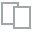
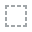
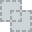
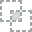
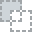
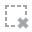
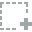
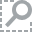
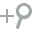
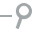
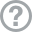
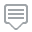
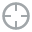
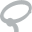
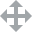
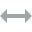
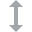
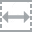
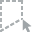
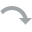
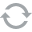
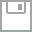
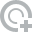
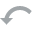
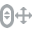
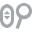
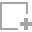
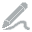
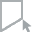
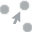
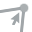
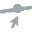

In [6]:
plot_missing(cd)

100%|##########| 4/4 [00:00<?, ?it/s]


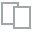
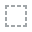
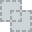
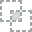
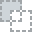
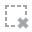
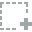
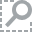
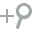
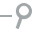
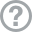
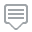
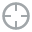
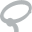
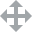
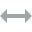
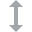
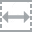
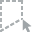
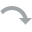
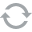
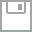
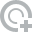
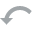
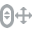
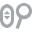
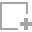
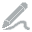
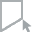
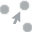
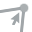
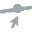

In [7]:
plot_correlation(cd)

  0%|          | 0/108 [00:00<?, ?it/s]


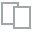
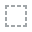
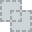
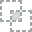
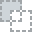
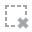
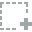
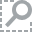
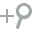
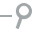
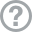
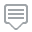
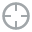
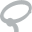
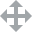
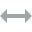
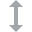
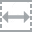
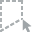
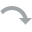
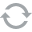
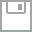
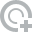
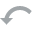
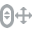
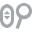
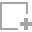
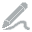
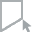
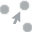
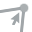
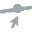

In [8]:
plot(cd, 'body_length')

  0%|          | 0/30 [00:00<?, ?it/s]


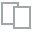
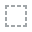
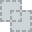
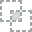
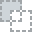
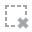
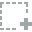
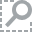
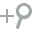
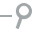
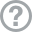
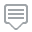
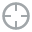
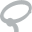
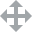
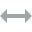
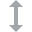
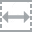
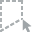
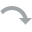
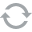
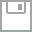
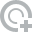
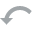
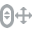
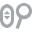
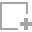
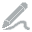
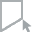
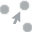
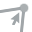
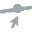

In [9]:
plot(cd, 'body_length', 'is_fraud')

## Map of Fraud by Country

In [10]:
all_location_data = cfd.loc[:, ["is_fraud", "country", "venue_latitude", "venue_longitude"]]
fraud_location_data = cfd.loc[cfd['is_fraud'] == "Fraud", ["is_fraud", "country",
                                                           "venue_latitude", "venue_longitude"]]
non_fraud_location_data = cfd.loc[cfd['is_fraud'] == "Not Fraud", ["is_fraud", "country",
                                                           "venue_latitude", "venue_longitude"]]

In [11]:
gdf = gpd.GeoDataFrame(
    all_location_data, geometry=gpd.points_from_xy(all_location_data.venue_longitude,
                                                   all_location_data.venue_latitude))

In [12]:
gdf.head()

is_fraud country  venue_latitude  venue_longitude  \
0  Not Fraud      US       41.831702       -73.030114   
1  Not Fraud      US       -1.000000        -1.000000   
2  Not Fraud      CA       43.181042       -79.226171   
3  Not Fraud      US       40.740865       -73.994083   
4  Not Fraud      US       33.825753       -84.355145   

                     geometry  
0  POINT (-73.03011 41.83170)  
1   POINT (-1.00000 -1.00000)  
2  POINT (-79.22617 43.18104)  
3  POINT (-73.99408 40.74087)  
4  POINT (-84.35514 33.82575)

### Overall Fraud Rate

In [13]:
total_overall = gdf.shape[0]
fraud_overall = gdf[gdf['is_fraud'] == 'Fraud'].shape[0]
non_fraud_overall = gdf[gdf['is_fraud'] == 'Not Fraud'].shape[0]
fraud_rate_overall = (fraud_overall / total_overall) *100

In [14]:
print(f'There are {total_overall} events overall.')
print(f'{fraud_overall}({fraud_rate_overall:.1f}%) of these are fraudulent. {non_fraud_overall} are not.')

There are 11469 events overall.
1040(9.1%) of these are fraudulent. 10429 are not.


### Location of Fraudulent Events

In [15]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

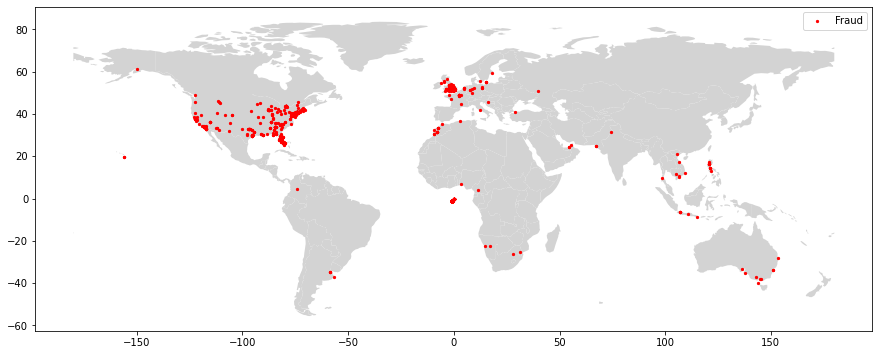

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
world.plot(ax=ax, color='lightgrey')

gdf[gdf['is_fraud'] == "Fraud"].plot(ax=ax, markersize=5, color='red', label="Fraud")
#gdf[gdf['is_fraud'] == "Not Fraud"].plot(ax=ax, markersize=5, color='green', label="Not Fraud")

ax.legend()
plt.show()

### Events with Unknown Location

In [17]:
full_join = gpd.sjoin(gdf, world, how='left')

/home/jeff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [18]:
unknown_only = full_join[full_join['name'].isnull()]

In [19]:
total_unknown = unknown_only.shape[0]
fraud_unknown = unknown_only[unknown_only['is_fraud'] == 'Fraud'].shape[0]
non_fraud_unknown = unknown_only[unknown_only['is_fraud'] == 'Not Fraud'].shape[0]
fraud_rate_unknown = (fraud_unknown / total_unknown) *100

In [20]:
print(f'There are {total_unknown} events without a known location.')
print(f'{fraud_unknown}({fraud_rate_unknown:.1f}%) of these are fraudulent. {non_fraud_unknown} are not.')

There are 1430 events without a known location.
364(25.5%) of these are fraudulent. 1066 are not.


### Mapping Fraudulent Events to Countries

In [21]:
polygon_df = gpd.sjoin(gdf, world, how='right')

/home/jeff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


In [22]:
polygon_df

index_left   is_fraud country  venue_latitude  venue_longitude   pop_est  \
0           NaN        NaN     NaN             NaN              NaN    920938   
1           NaN        NaN     NaN             NaN              NaN  53950935   
2           NaN        NaN     NaN             NaN              NaN    603253   
3           2.0  Not Fraud      CA       43.181042       -79.226171  35623680   
3          22.0  Not Fraud      CA       43.650718       -79.358025  35623680   
..          ...        ...     ...             ...              ...       ...   
172         NaN        NaN     NaN             NaN              NaN   7111024   
173         NaN        NaN     NaN             NaN              NaN    642550   
174         NaN        NaN     NaN             NaN              NaN   1895250   
175         NaN        NaN     NaN             NaN              NaN   1218208   
176         NaN        NaN     NaN             NaN              NaN  13026129   

         continent                 name iso_a3  gdp_md_est  \
0          Oceania                 Fiji    FJI      8374.0   
1           Africa             Tanzania    TZA    150600.0   
2           Africa            W. Sahara    ESH       906.5   
3    North America               Canada    CAN   1674000.0   
3    North America               Canada    CAN   1674000.0   
..             ...                  ...    ...         ...   
172         Europe               Serbia    SRB    101800.0   
173         Europe           Montenegro    MNE     10610.0   
174         Europe               Kosovo    -99     18490.0   
175  North America  Trinidad and Tobago    TTO     43570.0   
176         Africa             S. Sudan    SSD     20880.0   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[10161 rows x 11 columns]

In [23]:
polygon_df['count'] = 1
polygon_df['is_fraud_count'] = polygon_df['is_fraud'].apply(lambda x: 1 if x == 'Fraud' else 0)
polygon_df = polygon_df.loc[:, ['count', 'is_fraud_count', 'continent', 'name', 'iso_a3', 'geometry']]

In [25]:
agg_df = polygon_df.dissolve(by='name', aggfunc='sum')

In [26]:
agg_df['pct_fraud'] = agg_df['is_fraud_count'] / agg_df['count']

In [27]:
agg_df

geometry  \
name                                                                          
Afghanistan               POLYGON ((66.51861 37.36278, 67.07578 37.35614...   
Albania                   POLYGON ((21.02004 40.84273, 20.99999 40.58000...   
Algeria                   POLYGON ((-8.68440 27.39574, -8.66512 27.58948...   
Angola                    MULTIPOLYGON (((12.73517 -5.96568, 13.02487 -5...   
Argentina                 MULTIPOLYGON (((-65.05000 -54.70000, -65.50000...   
Armenia                   POLYGON ((46.50572 38.77061, 46.14362 38.74120...   
Australia                 MULTIPOLYGON (((145.29509 -42.03361, 144.71807...   
Austria                   POLYGON ((16.90375 47.71487, 16.34058 47.71290...   
Azerbaijan                MULTIPOLYGON (((45.45772 38.87414, 44.95269 39...   
Bahamas                   MULTIPOLYGON (((-77.89000 25.17000, -77.54000 ...   
Bangladesh                POLYGON ((92.67272 22.04124, 92.65226 21.32405...   
Belarus                   POLYGON ((28.17671 56.16913, 29.22951 55.91834...   
Belgium                   POLYGON ((4.79922 49.98537, 4.28602 49.90750, ...   
Belize                    POLYGON ((-89.14308 17.80832, -89.15091 17.955...   
Benin                     POLYGON ((2.69170 6.25882, 1.86524 6.14216, 1....   
Bhutan                    POLYGON ((91.69666 27.77174, 92.10371 27.45261...   
Bolivia                   POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...   
Bosnia and Herz.          POLYGON ((18.56000 42.65000, 17.67492 43.02856...   
Botswana                  POLYGON ((29.43219 -22.09131, 28.01724 -22.827...   
Brazil                    POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...   
Brunei                    POLYGON ((115.45071 5.44773, 115.40570 4.95523...   
Bulgaria                  POLYGON ((22.65715 44.23492, 22.94483 43.82379...   
Burkina Faso              POLYGON ((-5.40434 10.37074, -5.47056 10.95127...   
Burundi                   POLYGON ((30.46967 -2.41385, 30.52766 -2.80762...   
Cambodia                  POLYGON ((102.58493 12.18659, 102.34810 13.394...   
Cameroon                  POLYGON ((14.49579 12.85940, 14.89336 12.21905...   
Canada                    MULTIPOLYGON (((-132.73042 57.69289, -133.3555...   
Central African Rep.      POLYGON ((27.37423 5.23394, 27.04407 5.12785, ...   
Chad                      POLYGON ((23.83766 19.58047, 23.88689 15.61084...   
Chile                     MULTIPOLYGON (((-68.63335 -54.86950, -67.56244...   
China                     MULTIPOLYGON (((108.62622 19.36789, 109.11906 ...   
Colombia                  POLYGON ((-66.87633 1.25336, -67.06505 1.13011...   
Congo                     POLYGON ((18.45307 3.50439, 18.39379 2.90044, ...   
Costa Rica                POLYGON ((-82.54620 9.56613, -82.93289 9.47681...   
Croatia                   POLYGON ((16.56481 46.50375, 16.88252 46.38063...   
Cuba                      POLYGON ((-82.26815 23.18861, -81.40446 23.117...   
Cyprus                    POLYGON ((32.73178 35.14003, 32.91957 35.08783...   
Czechia                   POLYGON ((15.01700 51.10667, 15.49097 50.78473...   
Côte d'Ivoire             POLYGON ((-8.02994 10.20653, -7.89959 10.29738...   
Dem. Rep. Congo           POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...   
Denmark                   MULTIPOLYGON (((12.69001 55.60999, 12.08999 54...   
Djibouti                  POLYGON ((42.35156 12.54223, 42.77964 12.45542...   
Dominican Rep.            POLYGON ((-71.68774 18.31666, -71.94511 18.616...   
Ecuador                   POLYGON ((-75.37322 -0.15203, -75.23372 -0.911...   
Egypt                     POLYGON ((36.86623 22.00000, 32.90000 22.00000...   
El Salvador               POLYGON ((-89.35333 14.42413, -89.05851 14.340...   
Eq. Guinea                POLYGON ((9.64916 2.28387, 11.27645 2.26105, 1...   
Eritrea                   POLYGON ((36.42951 14.42211, 36.32322 14.82249...   
Estonia                   POLYGON ((27.98113 59.47537, 27.98112 59.47537...   
Ethiopia                  POLYGON ((47

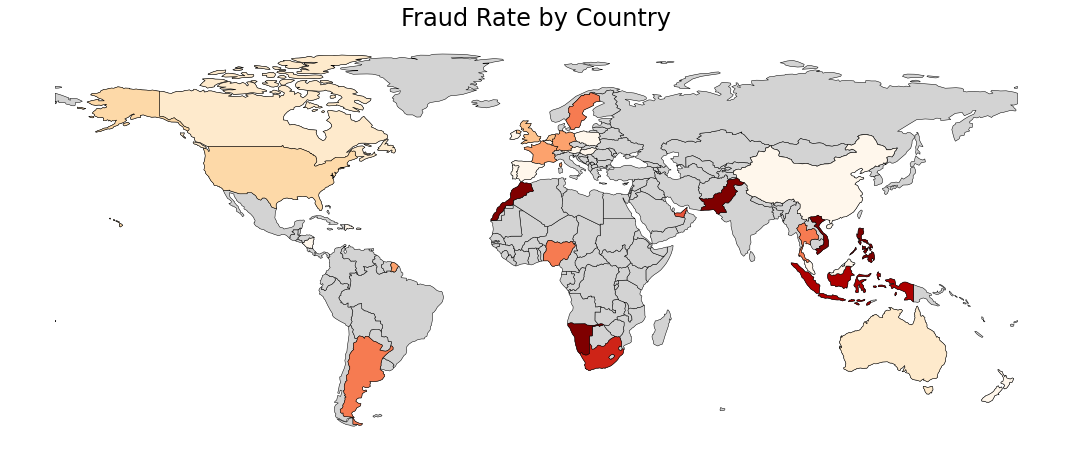

In [28]:
fig, ax = plt.subplots(figsize=(15, 20))
world.plot(ax=ax, color='lightgrey', edgecolor='black', linewidth=0.5)
agg_df[agg_df['count'] > 1].plot(ax=ax, column = 'pct_fraud', cmap='OrRd',
                                     scheme='natural_breaks', legend=False, k=10,
                                     edgecolor='black', linewidth=0.5)
ax.set_title('Fraud Rate by Country', fontsize=24, pad=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
fig.tight_layout()
fig.patch.set_facecolor('white')
#plt.savefig(f'../images/fraud_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

### Fraud Rate by Country

In [29]:
agg_df = agg_df.reset_index()

In [30]:
agg_df['non_fraud_count'] = agg_df['count'] - agg_df['is_fraud_count']

In [31]:
agg_df

name  \
0                 Afghanistan   
1                     Albania   
2                     Algeria   
3                      Angola   
4                   Argentina   
5                     Armenia   
6                   Australia   
7                     Austria   
8                  Azerbaijan   
9                     Bahamas   
10                 Bangladesh   
11                    Belarus   
12                    Belgium   
13                     Belize   
14                      Benin   
15                     Bhutan   
16                    Bolivia   
17           Bosnia and Herz.   
18                   Botswana   
19                     Brazil   
20                     Brunei   
21                   Bulgaria   
22               Burkina Faso   
23                    Burundi   
24                   Cambodia   
25                   Cameroon   
26                     Canada   
27       Central African Rep.   
28                       Chad   
29                      Chile   
30                      China   
31                   Colombia   
32                      Congo   
33                 Costa Rica   
34                    Croatia   
35                       Cuba   
36                     Cyprus   
37                    Czechia   
38              Côte d'Ivoire   
39            Dem. Rep. Congo   
40                    Denmark   
41                   Djibouti   
42             Dominican Rep.   
43                    Ecuador   
44                      Egypt   
45                El Salvador   
46                 Eq. Guinea   
47                    Eritrea   
48                    Estonia   
49                   Ethiopia   
50               Falkland Is.   
51                       Fiji   
52                    Finland   
53     Fr. S. Antarctic Lands   
54                     France   
55                      Gabon   
56                     Gambia   
57                    Georgia   
58                    Germany   
59                      Ghana   
60                     Greece   
61                  Greenland   
62                  Guatemala   
63                     Guinea   
64              Guinea-Bissau   
65                     Guyana   
66                      Haiti   
67                   Honduras   
68                    Hungary   
69                    Iceland   
70                      India   
71                  Indonesia   
72                       Iran   
73                       Iraq   
74                    Ireland   
75                     Israel   
76                      Italy   
77                    Jamaica   
78                      Japan   
79                     Jordan   
80                 Kazakhstan   
81                      Kenya   
82                     Kosovo   
83                     Kuwait   
84                 Kyrgyzstan   
85                       Laos   
86                     Latvia   
87                    Lebanon   
88                    Lesotho   
89                    Liberia   
90                      Libya   
91                  Lithuania   
92                 Luxembourg   
93                  Macedonia   
94                 Madagascar   
95                     Malawi   
96                   Malaysia   
97                       Mali   
98                 Mauritania   
99                     Mexico   
100                   Moldova   
101                  Mongolia   
102                Montenegro   
103                   Morocco   
104                Mozambique   
105                   Myanmar   
106                 N. Cyprus   
107                   Namibia   
108                     Nepal   
109               Netherlands   
110             New Caledonia   
111               New Zealand   
112                 Nicaragua   
113                     Niger   
114                   Nigeria   
115               North Korea   
116                    Norway   
117                      Oman   
118                  Pakistan   
119                 Palestine   
120                    Panama   

In [32]:
overall = agg_df.agg(['sum'])
overall['name'] = 'World'
overall['pct_fraud'] = overall['is_fraud_count'] / overall['count']

In [33]:
overall

name  count  is_fraud_count  pct_fraud  non_fraud_count
sum  World  10161             676   0.066529             9485

In [34]:
other_countries = agg_df[~agg_df['name'].isin(['United States of America',
                                                      'United Kingdom',
                                                      'Australia',
                                                      'Canada'])].agg('sum')
other_countries['name'] = 'Other Countries'
other_countries['pct_fraud'] = other_countries['is_fraud_count'] / other_countries['count']

In [35]:
other_countries

name               Other Countries
count                          453
is_fraud_count                  83
pct_fraud                 0.183223
non_fraud_count                370
dtype: object

In [36]:
full_df = agg_df.append(overall)
full_df = full_df.append(other_countries, ignore_index=True)

In [37]:
full_df.sort_values('count', ascending=False)

name  \
176                     World   
165  United States of America   
164            United Kingdom   
26                     Canada   
6                   Australia   
177           Other Countries   
54                     France   
111               New Zealand   
74                    Ireland   
58                    Germany   
109               Netherlands   
144                     Spain   
12                    Belgium   
103                   Morocco   
124               Philippines   
71                  Indonesia   
4                   Argentina   
170                   Vietnam   
163      United Arab Emirates   
127               Puerto Rico   
125                    Poland   
118                  Pakistan   
142              South Africa   
30                      China   
96                   Malaysia   
7                     Austria   
126                  Portugal   
68                    Hungary   
42             Dominican Rep.   
107                   Namibia   
148                    Sweden   
114                   Nigeria   
112                 Nicaragua   
154                  Thailand   
120                    Panama   
119                 Palestine   
121          Papua New Guinea   
122                  Paraguay   
172                     Yemen   
117                      Oman   
116                    Norway   
173                    Zambia   
123                      Peru   
115               North Korea   
169                 Venezuela   
171                 W. Sahara   
157       Trinidad and Tobago   
113                     Niger   
168                   Vanuatu   
174                  Zimbabwe   
108                     Nepal   
106                 N. Cyprus   
105                   Myanmar   
104                Mozambique   
175                  eSwatini   
102                Montenegro   
101                  Mongolia   
100                   Moldova   
99                     Mexico   
98                 Mauritania   
97                       Mali   
110             New Caledonia   
167                Uzbekistan   
158                   Tunisia   
128                     Qatar   
156                      Togo   
155               Timor-Leste   
159                    Turkey   
153                  Tanzania   
152                Tajikistan   
151                    Taiwan   
150                     Syria   
149               Switzerland   
147                  Suriname   
146                     Sudan   
145                 Sri Lanka   
160              Turkmenistan   
143               South Korea   
161                    Uganda   
141                Somaliland   
140                   Somalia   
139               Solomon Is.   
95                     Malawi   
137                  Slovakia   
136              Sierra Leone   
135                    Serbia   
134                   Senegal   
133              Saudi Arabia   
132                  S. Sudan   
162                   Ukraine   
131                    Rwanda   
130                    Russia   
129                   Romania   
166                   Uruguay   
138                  Slovenia   
0                 Afghanistan   
94                 Madagascar   
25                   Cameroon   
28                       Chad   
29                      Chile   
31                   Colombia   
32                      Congo   
33                 Costa Rica   
34                    Croatia   
35                       Cuba   
36                     Cyprus   
37                    Czechia   
38              Côte d'Ivoire   
39            Dem. Rep. Congo   
40                    Denmark   
41                   Djibouti   
43                    Ecuador   
44                      Egypt   
45                El Salvador   
46                 Eq. Guinea   
27       Central African Rep.   
24                   Cambodia   
93                  Macedonia   
23                    Burundi   
2                     Algeria   
3                      Angola   

In [38]:
def fraud_by_country(df):
    for country in df['country'].value_counts().index.tolist():
        total_events = df[df['country'] == country].is_fraud.value_counts().sum()
        non_fraud_count = df[df['country'] == country].is_fraud.value_counts().get('Not Fraud', default=0)
        fraud_count = df[df['country'] == country].is_fraud.value_counts().get('Fraud', default=0)
        pct_non_fraud = round(non_fraud_count / total_events * 100) 
        pct_fraud = round(fraud_count / total_events * 100)
        print(country)
        print(f' Total Events: {total_events}, Not Fraud: {pct_non_fraud}% ({non_fraud_count}) Fraud: {pct_fraud}% ({fraud_count})')

In [39]:
fraud_by_country(gdf)

US
 Total Events: 7404, Not Fraud: 93% (6899) Fraud: 7% (505)
GB
 Total Events: 1639, Not Fraud: 87% (1420) Fraud: 13% (219)
CA
 Total Events: 1016, Not Fraud: 95% (969) Fraud: 5% (47)
AU
 Total Events: 583, Not Fraud: 98% (572) Fraud: 2% (11)
Unknown
 Total Events: 317, Not Fraud: 89% (283) Fraud: 11% (34)
NZ
 Total Events: 64, Not Fraud: 84% (54) Fraud: 16% (10)
MA
 Total Events: 39, Not Fraud: 0% (0) Fraud: 100% (39)
IE
 Total Events: 39, Not Fraud: 100% (39) Fraud: 0% (0)
FR
 Total Events: 34, Not Fraud: 91% (31) Fraud: 9% (3)
DE
 Total Events: 32, Not Fraud: 59% (19) Fraud: 41% (13)
NL
 Total Events: 31, Not Fraud: 84% (26) Fraud: 16% (5)
VN
 Total Events: 24, Not Fraud: 4% (1) Fraud: 96% (23)
A1
 Total Events: 23, Not Fraud: 0% (0) Fraud: 100% (23)
HU
 Total Events: 18, Not Fraud: 100% (18) Fraud: 0% (0)
ES
 Total Events: 18, Not Fraud: 100% (18) Fraud: 0% (0)
PK
 Total Events: 18, Not Fraud: 6% (1) Fraud: 94% (17)
BE
 Total Events: 17, Not Fraud: 94% (16) Fraud: 6% (1)
PH
 Total

### Folium Mapping

In [42]:
lng, lat = -73.99190, 40.75362
folium.Map(location=[lat, lng])

## Seaborn Plotting Comparing Fraud vs Not Fraud

In [43]:
def compare_fraud_vs_not_fraud(df, feature, title, save=False):
    fig, ax1 = plt.subplots(figsize=(12, 6))
    ax1 = sns.kdeplot(ax=ax1, data=df, x=feature,
                hue="is_fraud", fill=True, palette=['cornflowerblue', 'lightcoral'],
               common_norm=False)
    ax1.set_title(title, fontsize=24, pad=10)
    ax1.set_xlabel(feature.replace('_', ' ').title(), fontsize=18)
    ax1.set_ylabel('Density', fontsize=18)
    ax1.get_legend().set_title(None)
    plt.setp(ax1.get_legend().get_texts(), fontsize='18')
    for patch in ax1.get_legend().get_patches():
        patch.set_height(12)
    
    fig.tight_layout(pad=0)
    
    if save:
        plt.savefig(f'../images/{feature}_comparison.png', dpi=300,
                    bbox_inches='tight', facecolor='w')

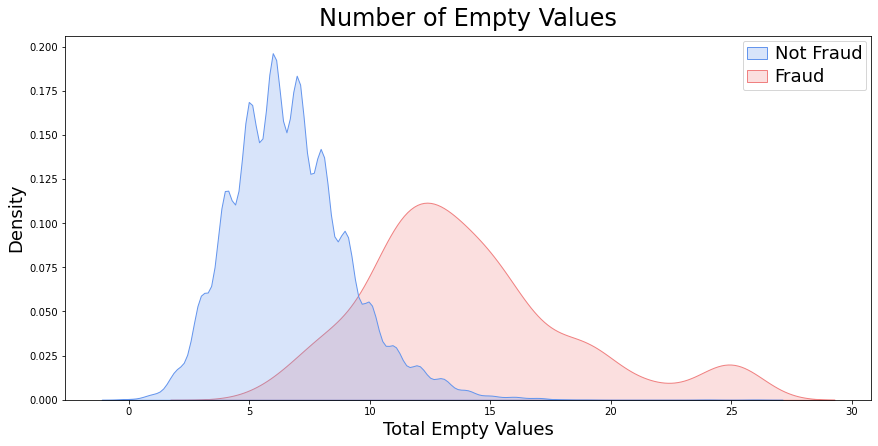

In [44]:
feature = 'total_empty_values'
compare_fraud_vs_not_fraud(cd, feature, 'Number of Empty Values', save=False)

In [ ]:
for feature in cd.columns.drop('is_fraud'):
    compare_fraud_vs_not_fraud(cd, feature, feature)